In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dicio={
'nan':0,'Mr.':1 ,'Mrs.':2,'Miss.':3 ,'Master.':4 ,'Planke':5,'Don.':6 ,'Rev.':7,'Ms.':8 ,'Major.':9 ,'Col.':10 ,'Capt.':11 }

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
dataframe =[train_df,test_df]
for i in dataframe:
    i['Sex'] = i['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    i['Embarked'] = i['Embarked'].fillna('S')
    i['Embarked'] = i['Embarked'].map( {'S': 1, 'C': 0,'Q': 2} ).astype(int)    
    i['Cabin']=i['Cabin'].fillna('0')
    i['Fare']=i['Fare'].fillna('0')
    i['Age']=i['Age'].fillna('0')
    i['NameSr']=i.Name.str.split().str[1].map(dicio).astype(str)#.loc[i.NameSr == 'nan','NameSr']=0
    i.loc[i.NameSr == 'nan','NameSr']=0
    i.loc[i.Cabin != '0','Cabin']=1
    #i.drop(['PassengerId','Ticket','Name'],axis = 1, inplace=True)
    

In [4]:
#train_df['NameSr']=train_df.Name.str.split().str[1].map(dicio).astype(str).loc[train_df.NameSr == 'nan','NameSr']=0
#train_df.loc[train_df.NameSr == 'nan','NameSr']=0
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameSr
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0,1,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1,0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0,1,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,1,1,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0,1,1.0


In [5]:
#train_df.Cabin.value_counts()
#train_df.Fare.isnull().sum()

In [6]:
#train_df.Cabin.value_counts()
Y_train=train_df['Survived']
X_train=train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','NameSr']]
X_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','NameSr']]

In [7]:
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
NameSr      0
dtype: int64

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# Logistic Regression
logreg = LogisticRegression() #(C=0.1, penalty='l1', tol=1e-6)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

result_train = logreg.score(X_train, Y_train)
result_val = cross_val_score(logreg,X_train, Y_train, cv=5).mean()
print('taring score = %s , while validation score = %s' %(result_train , result_val))

taring score = 0.7934904601571269 , while validation score = 0.7878891916304316


In [9]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)
print('Exported')

Exported


In [10]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [13]:
train_Y=train_df['Survived']
train_X=train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','NameSr']]
test_X = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','NameSr']]

Important features
____________________________________________________________
98.43


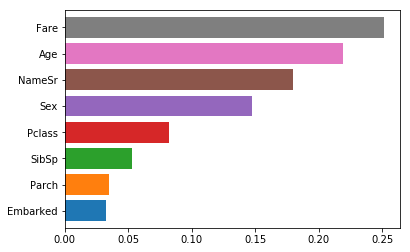

In [14]:
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

In [17]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_rf})
submission.to_csv('titanic2.csv', index=False)
print('Exported')

Exported
